In [3]:
import pandas as pd 
import numpy as np
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
df = pd.read_csv("Resume Screening.csv")

print(df.head())
print(df.columns)
print(df.info())

       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...
Index(['Category', 'Resume'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None


In [5]:
resume_column = "Resume"

In [6]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [7]:
df['clean_resume'] = df[resume_column].apply(clean_text)

In [8]:
job_description = """
Looking for a Python Developer with experience in Machine Learning,
Natural Language Processing (NLP), SQL, REST APIs, Git,
Pandas, and Scikit-learn. Experience in model building and
data preprocessing required.
"""

In [9]:
job_description_clean = clean_text(job_description)

In [10]:
documents = df['clean_resume'].tolist()
documents.append(job_description_clean)

In [11]:
vectorizer = TfidfVectorizer(stop_words='english')

tfidf_matrix = vectorizer.fit_transform(documents)

In [12]:
resume_vectors = tfidf_matrix[:-1]
jd_vector = tfidf_matrix[-1]

In [13]:
similarity_scores = cosine_similarity(
    resume_vectors,
    jd_vector.reshape(1, -1)
).flatten()

In [14]:
df['similarity_score'] = similarity_scores

In [15]:
df_ranked = df.sort_values(
    by='similarity_score',
    ascending=False
)

df_ranked[['similarity_score']].head(10)

,similarity_score
37,0.254758
17,0.254758
7,0.254758
27,0.254758
38,0.235507
28,0.235507
18,0.235507
8,0.235507
584,0.153175
566,0.153175


In [16]:
required_skills = [
    "python",
    "machine learning",
    "nlp",
    "sql",
    "rest api",
    "git",
    "pandas",
    "scikit learn"
]

In [17]:
def find_missing_skills(resume):
    missing = []
    for skill in required_skills:
        if skill not in resume:
            missing.append(skill)
    return missing

In [ ]:
df_ranked['missing_skills'] = df_ranked['clean_resume'].apply(find_missing_skills)

df_ranked[['similarity_score', 'missing_skills']].head(5)

In [18]:
df_ranked.to_csv("ranked_candidates.csv", index=False)

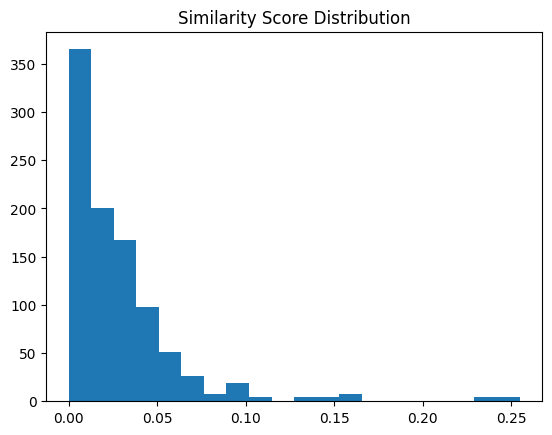

In [19]:
import matplotlib.pyplot as plt

plt.hist(df_ranked['similarity_score'], bins=20)
plt.title("Similarity Score Distribution")
plt.show()

In [20]:
df_ranked[['Resume', 'similarity_score']].head(3)

,Resume,similarity_score
37,Education Details \r\n B.Tech Rayat and Bahr...,0.254758
17,Education Details \r\n B.Tech Rayat and Bahr...,0.254758
7,Education Details \r\n B.Tech Rayat and Bahr...,0.254758
